In [6]:
from keras_preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np

class FeatureExtractor:
    def __init__(self):
        base_model = VGG16(weights='imagenet')
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

    def extract(self, img):
        img = img.resize((224, 224))  # VGG must take a 224x224 img as an input
        img = img.convert('RGB')  # Make sure img is color
        x = image.img_to_array(img)  # To np.array. Height x Width x Channel. dtype=float32
        x = np.expand_dims(x, axis=0)  # (H, W, C)->(1, H, W, C), where the first elem is the number of img
        x = preprocess_input(x)  # Subtracting avg values for each pixel
        feature = self.model.predict(x)[0]  # (1, 4096) -> (4096, )
        return feature / np.linalg.norm(feature)  # Normalize

In [ ]:
from PIL import Image
from pathlib import Path
import numpy as np

if __name__ == '__main__':
    fe = FeatureExtractor()

    for img_path in sorted(Path("/content/drive/MyDrive/iot_dataset/iot_dataset").glob("*.jpg")):
        feature = fe.extract(img=Image.open(img_path))
        feature_path = Path("/content/drive/MyDrive/features_iot") / (img_path.stem + ".npy")
        np.save(feature_path, feature)

Pest Detection code starts from here

REQUIRED LIBRARIES TO INSTALL

In [ ]:
pip install keras tensorflow Keras-Preprocessing

CUSTOM MODEL TRAINING

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd

# Set the input and output directories
train_dir = "/content/drive/MyDrive/iot_dataset/pest/train"
test_dir = "/content/drive/MyDrive/iot_dataset/pest/test"

# Set the number of epochs and batch size
epochs = 10
batch_size = 32

# Set up the image data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

# Get the class names
class_names = list(train_generator.class_indices.keys())
print(class_names)
# Define the number of classes
num_classes = len(class_names)

# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=epochs, validation_data=test_generator)
model.save('/content/drive/MyDrive/pest_disease_model_2.h5')
# Evaluate the model on the test data
model.evaluate(test_generator)

# Make predictions on a test image
test_image = "/content/beetle.jpeg" # path to a test image
img = tf.keras.preprocessing.image.load_img(test_image, target_size=(224, 224))
x = tf.keras.preprocessing.image.img_to_array(img)
x = x / 255.0
x = tf.reshape(x, (1, 224, 224, 3))
predictions = model.predict(x)
class_index = tf.argmax(predictions, axis=1)[0]
class_name = class_names[class_index]

# Display the image and predicted class name
plt.imshow(img)
plt.title(class_name)
plt.show()

RESNET MODEL TRAINING

Found 2700 images belonging to 9 classes.
Found 450 images belonging to 9 classes.
94668760/94668760 [==============================] - 1s 0us/step
Epoch 1/10
85/85 [==============================] - 1983s 23s/step - loss: 1.7716 - accuracy: 0.3837 - val_loss: 24.1132 - val_accuracy: 0.2022
Epoch 2/10
85/85 [==============================] - 1932s 23s/step - loss: 1.3038 - accuracy: 0.5678 - val_loss: 38.6012 - val_accuracy: 0.1556
Epoch 3/10
85/85 [==============================] - 1933s 23s/step - loss: 0.9029 - accuracy: 0.7093 - val_loss: 3.2352 - val_accuracy: 0.4778
Epoch 4/10
85/85 [==============================] - 1940s 23s/step - loss: 0.6104 - accuracy: 0.8004 - val_loss: 2.1234 - val_accuracy: 0.5644
Epoch 5/10
85/85 [==============================] - 1942s 23s/step - loss: 0.5200 - accuracy: 0.8315 - val_loss: 2.3684 - val_accuracy: 0.5289
Epoch 6/10
85/85 [==============================] - 1933s 23s/step - loss: 0.3676 - accuracy: 0.8841 - val_loss: 3.7831 - val_accuracy:

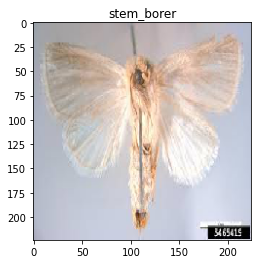

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd

# Set the input and output directories
train_dir = "/content/drive/MyDrive/iot_dataset/pest/train"
test_dir = "/content/drive/MyDrive/iot_dataset/pest/test"

# Set the number of epochs and batch size
epochs = 10
batch_size = 32

# Set up the image data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

# Get the class names
class_names = list(train_generator.class_indices.keys())

# Define the number of classes
num_classes = len(class_names)

# Define the ResNet50V2 model
model = tf.keras.Sequential([
    ResNet50V2(include_top=False, pooling='avg', weights='imagenet'),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=epochs, validation_data=test_generator)
model.save('/content/drive/MyDrive/pest_disease_model_resnet.h5')

# Evaluate the model on the test data
model.evaluate(test_generator)

# Make predictions on a test image
test_image = "/content/testpest2.jpg" # path to a test image
img = tf.keras.preprocessing.image.load_img(test_image, target_size=(224, 224))
x = tf.keras.preprocessing.image.img_to_array(img)
x = x / 255.0
x = tf.reshape(x, (1, 224, 224, 3))
predictions = model.predict(x)
class_index = tf.argmax(predictions, axis=1)[0]
class_name = class_names[class_index]

# Display the image and predicted class name
plt.imshow(img)
plt.title(class_name)
plt.show()

INFERENCE CODE FOR TESTING THE MODELS

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


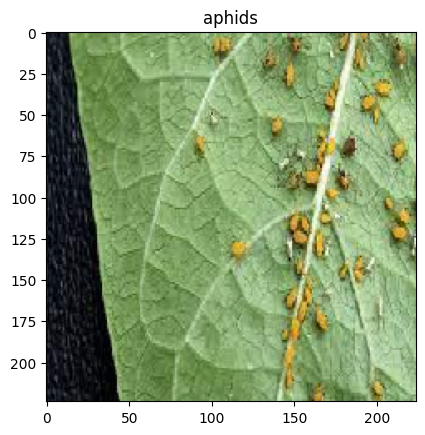

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model
import tensorflow as tf
#from keras.preprocessing import image
import keras.utils as image
import cv2
from google.colab.patches import cv2_imshow
# Load the trained model from disk
model = load_model('/content/drive/MyDrive/pest_disease_model_resnet.h5')

# Define a function to predict the pest disease based on an input image
def predict_pest_disease(image_path):
    # Load the input image and preprocess it
    img = image.load_img(image_path, target_size=(64, 64))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0

    # Use the trained model to predict the class label of the input image
    pred = model.predict(x)
    # get the predicted class label
    predicted_class_label = np.argmax(pred)

    # get the predicted class name
    predicted_class_name = class_names[predicted_class_label]
    if pred < 0.5:
      return 'The plant is healthy.'
    else:
        return 'The plant is infected with a pest disease. '

'''# Test the function with an input image
image_path = '/content/mosquito.jpg'
img=cv2.imread(image_path)
cv2_imshow(img)
result = predict_pest_disease(image_path)
print(result)'''

class_names = ['aphids', 'armyworm', 'beetle', 'bollworm', 'grasshopper', 'mites', 'mosquito', 'sawfly', 'stem_borer']

# Make predictions on a test image
test_image = "/content/drive/MyDrive/PEST SAMPLE.jpg" # path to a test image
img = tf.keras.preprocessing.image.load_img(test_image, target_size=(224, 224))
x = tf.keras.preprocessing.image.img_to_array(img)
x = x / 255.0
x = tf.reshape(x, (1, 224, 224, 3))
predictions = model.predict(x)
class_index = tf.argmax(predictions, axis=1)[0]
class_name = class_names[class_index]

# Display the image and predicted class name
plt.imshow(img)
plt.title(class_name)
plt.show()